### Plots to show in Final Docs

In [64]:
import numpy as np
import ta as ta_lib
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use('seaborn')

### SMA

In [65]:
df = yf.download('EQTL3.SA', period='5y')
df['SMA_10'] = df['Close'].rolling(10).mean()
df['SMA_200'] = df['Close'].rolling(200).mean()
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


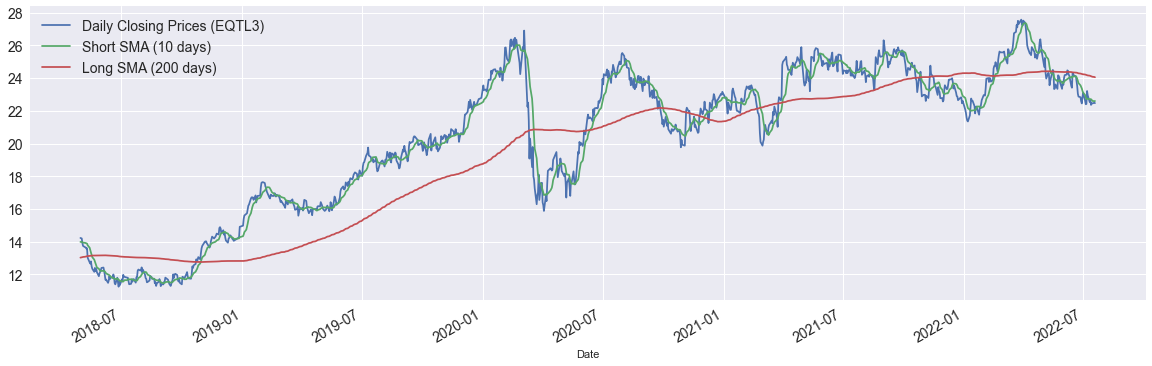

In [66]:
fig, ax = plt.subplots(figsize=(20,6))
df[['Close', 'SMA_10', 'SMA_200']].plot(ax=ax, fontsize=14);
#ax.set_title('SMA vs. EMA on PETR4 Closing Prices')
plt.legend(['Daily Closing Prices (EQTL3)', 'Short SMA (10 days)', 'Long SMA (200 days)'], fontsize=14)
plt.show();

### SMA vs. EMA

In [67]:
df = yf.download('PETR4.SA', period='1y')
df['SMA_10'] = df['Close'].rolling(10).mean()
df['EMA_10'] = ta_lib.trend.ema_indicator(df['Close'], window=10)
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [68]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_10
Date,,,,,,,,
2021-07-30,27.600000,27.830000,26.830000,26.910000,18.544754,74150400,27.048,27.079367
2021-08-02,27.200001,27.410000,26.370001,26.410000,18.200184,70528800,27.065,26.957664
2021-08-03,26.360001,26.870001,25.790001,26.850000,18.503407,71850400,27.091,26.938089
2021-08-04,26.549999,26.770000,25.950001,26.280001,18.110596,87970600,27.023,26.818436
2021-08-05,28.750000,28.980000,28.059999,28.350000,19.537117,223915900,27.168,27.096903


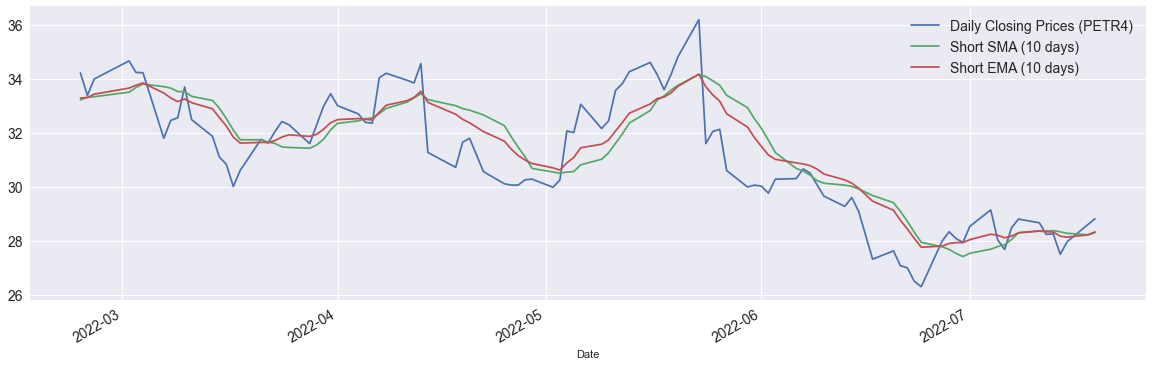

In [69]:
fig, ax = plt.subplots(figsize=(20,6))
df[['Close', 'SMA_10', 'EMA_10']].tail(100).plot(ax=ax, fontsize=14);
#ax.set_title('SMA vs. EMA on PETR4 Closing Prices')
plt.legend(['Daily Closing Prices (PETR4)', 'Short SMA (10 days)', 'Short EMA (10 days)'], fontsize=14)
plt.show();

### Selic vs. IBOV

In [71]:
selic = pd.read_csv('../../data/macro/selic.csv', sep=';')
selic['date'] = pd.to_datetime(selic['date'])
selic['value'] = selic['value'] * 100 * 252
selic.set_index('date', inplace=True)
selic = selic.sort_index(ascending=True)

In [87]:
selic.tail()

,value
date,
2022-07-07,12.357324
2022-07-08,12.357324
2022-07-11,12.357324
2022-07-12,12.357324
2022-07-13,12.357324


In [78]:
ibov = yf.download('^BVSP', period='7y')
ibov

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-20,52341.00000,52424.000000,51525.000000,51600.0000,51600.0000,2635000
2015-07-21,51603.00000,51998.000000,51244.000000,51474.0000,51474.0000,2942600
2015-07-22,51474.00000,51474.000000,50592.000000,50916.0000,50916.0000,3123300
2015-07-23,50916.00000,51063.000000,49668.000000,49807.0000,49807.0000,4181500
2015-07-24,49804.00000,49831.000000,48624.000000,49246.0000,49246.0000,3632500
...,...,...,...,...,...,...
2022-07-13,98258.00000,98928.000000,97403.000000,97881.0000,97881.0000,12208100
2022-07-14,97879.00000,97879.000000,95431.000000,96121.0000,96121.0000,12579000
2022-07-15,96119.00000,96971.000000,95267.000000,96551.0000,96551.0000,11347600


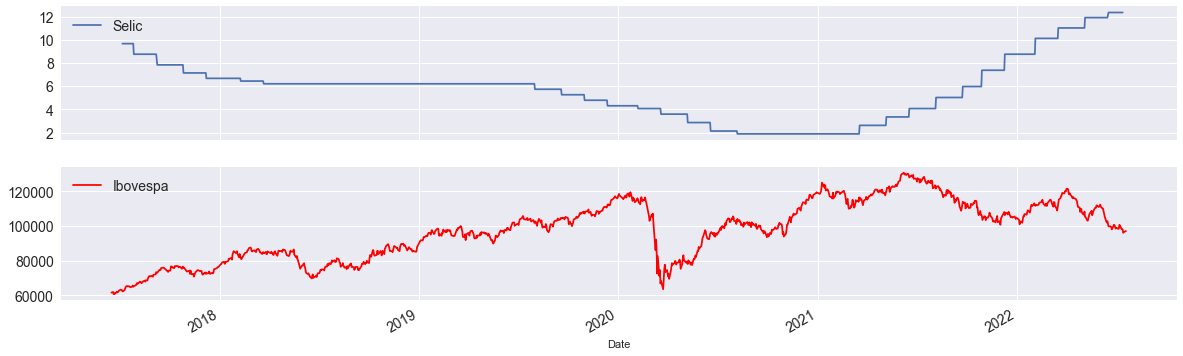

In [86]:
fig, ax = plt.subplots(2, figsize=(20,6), sharex=True)
# Selic
selic.tail(252 * 5).value.plot(ax=ax[0], fontsize=14)
ax[0].legend(['Selic'], fontsize=14)

# Ibovespa
ibov.tail(252 * 5).Close.plot(ax=ax[1], fontsize=14, color='red')
ax[1].legend(['Ibovespa'], fontsize=14)

plt.show();